In [138]:
import numpy as np
from scipy.integrate  import odeint
import sympy as sp
import matplotlib.pyplot as plt
import math
from math import e, sin, cos
from IPython.display import display

<h1>Modeling diff Eqa.</h1>

In [107]:
## parameters
Q0 = 50
water = 100
water_in_rate = 3
water_out_rate = 3
enter_salt = 0.25
t_end = 100

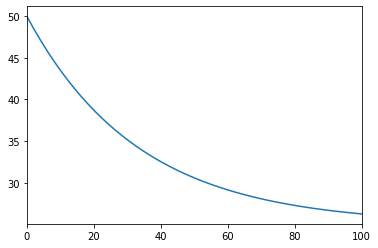

In [108]:
#scipy->odeint

def model(y, t):
  return water_in_rate*enter_salt - water_out_rate * y/water

t = np.linspace(0,t_end)
y = odeint(model, Q0, t)

plt.xlim(0,100)
plt.plot(t,y)

In [109]:
## sympy + lambdify
t = sp.symbols('t')
Q = sp.Function('Q')(t)

print("eqution = ")
eqa = sp.Eq(Q.diff(t), water_in_rate*enter_salt - water_out_rate * Q/water)
display(eqa)

print("solution = ")
sol = sp.dsolve(eqa,Q,ics = {Q.subs(t,0):Q0})
display(sol)

eqution = 


Eq(Derivative(Q(t), t), 0.75 - 3*Q(t)/100)

solution = 


Eq(Q(t), 25.0 + 25.0*exp(-3*t/100))

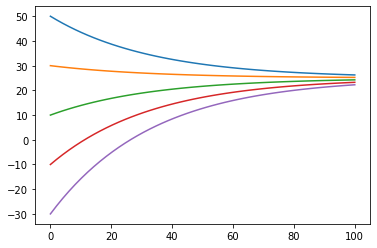

In [110]:
# pyplot
for i in range(5):
  sol = sp.dsolve(eqa,Q,ics = {Q.subs(t,0):Q0-i*20})
  f = sp.lambdify(t, sol.rhs)
  x = np.linspace(0,t_end)
  y = f(x)
  if Q0 == enter_salt*water and water_in_rate == water_out_rate:
    y = np.full_like(x,enter_salt*water)
  plt.plot(x,y)

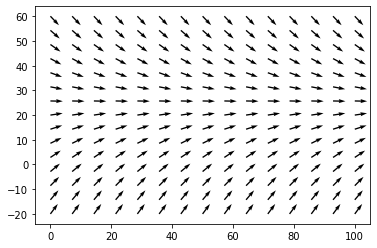

In [111]:
## quiver
f = sp.lambdify([Q,t], eqa.rhs)
x = np.linspace(0,100,15)
y = np.linspace(-20,60,15)
xx,yy = np.meshgrid(x,y)
ss = f(yy,xx)
vx = np.cos(np.arctan(ss))
vy = np.sin(np.arctan(ss))
plt.quiver(xx,yy,vx,vy)

In [112]:
# limit to inf 1

limiteqa = sp.Eq(0,eqa.rhs)
limitsol = sp.solve(limiteqa, Q)
print("the solution of t -> inf is {:.3f}".format(limitsol[0]))

the solution of t -> inf is 25.000


In [113]:
# limit to inf 2

limitsol = sol.rhs.limit(t, math.inf)
print("the solution of t -> inf is {:.3f}".format(limitsol))

the solution of t -> inf is 25.000


<h1>Euler Method</h1>

In [114]:
t = sp.symbols('t')
y = sp.Function('y')(t)
eqa = sp.Eq(y.diff(t), 3 - 2*t - 0.5*y)
display(eqa)

Eq(Derivative(y(t), t), -2*t - 0.5*y(t) + 3)

In [115]:
# Euler method
y0 = 1
h = 0.2
tstart = 0
tend = 1

def slope(y, t):
    return (3 - 2*t - 0.5*y)

y = [1]
x = np.arange(tstart, tend+h, h)
for i in range(int((tend-tstart)/h)):
    print(y[i])
    y.append(y[i] + slope(y[i],x[i]) * h)


1
1.5
1.87
2.123
2.2707


1.0000
2.1151
1.2176
-0.9007
-3.7594
-7.0671
1
2.6875
1.88671875
1
2.379638671875
1.5330840945243835
1
2.32363
1.4671802787


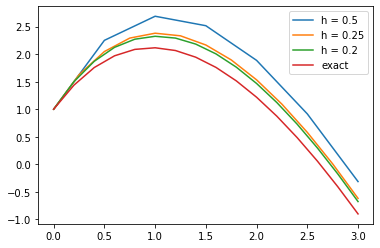

In [116]:
# sympy + lambdify

t = sp.symbols('t')
y = sp.Function('y')(t)

eqa = sp.Eq(y.diff(t), 3 - 2*t - 0.5*y)
sol = sp.dsolve(eqa, y, ics = {y.subs(t,0):1})
f = sp.lambdify(t, sol.rhs)

for i in range(6):
    print("{:5.4f}".format(f(i)))

# Euler method
h = [0.5, 0.25, 0.2]
tstart = 0
tend = 3

def slope(y, t):
    return (3 - 2*t - 0.5*y)

for dt in h:
    y = [1]
    x = np.arange(tstart, tend+dt, dt)
    for i in range(int((tend-tstart)/dt)):
        if i % (1/dt) == 0: 
            print(y[i])
        y.append(y[i] + slope(y[i],x[i]) * dt)
    plt.plot(x,np.array(y), label = "h = {}".format(dt))

#exact
plt.plot(x,f(x), label = "exact")

plt.legend()

1.0
15.777275
104.6784
652.53486
4042.1218
25026.955
1.0
17.250625
123.71295
837.07451
5633.3506
37897.434
1.0
18.109969
135.54396
959.25796
6755.1752
47555.347
1.0
19.0699
149.3949
1109.179
8197.884
60573.53


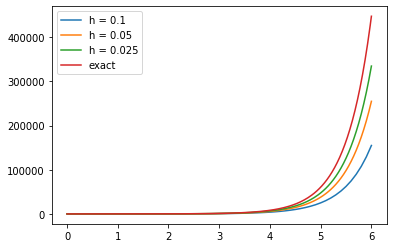

In [117]:
# Euler method
h = [0.1, 0.05, 0.025]
tstart = 0
tend = 6

def slope(y, t):
    return (4 - t + 2*y)

for dt in h:
    y = [1.0]
    x = np.arange(tstart, tend+dt, dt)
    for i in range(int((tend-tstart)/dt)):
        if i % (1/dt) == 0: 
            print("{:.8}".format(y[i]))
        y.append(y[i] + slope(y[i],x[i]) * dt)
    plt.plot(x,np.array(y), label = "h = {}".format(dt))

#exact
t = sp.symbols('t')
y = sp.Function('y')(t)

eqa = sp.Eq(y.diff(t), 4 - t +2*y)
sol = sp.dsolve(eqa, y, ics = {y.subs(t,0):1})
f = sp.lambdify(t, sol.rhs)
plt.plot(x,f(x), label = "exact")

for i in range(6):
    print("{:.7}".format(f(i)))

plt.legend()

<h1>more</h1>

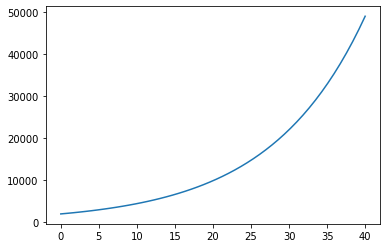

In [118]:
#scipy

def model(S, t, r):
    return r*S

S0 = 2000
t = np.linspace(0,40)
r = 0.08
y = odeint(model, S0, t, args = (r,))

plt.plot(t,y)

Eq(Derivative(s(t), t), 0.08*s(t))

Eq(s(t), 2000*exp(0.08*t))

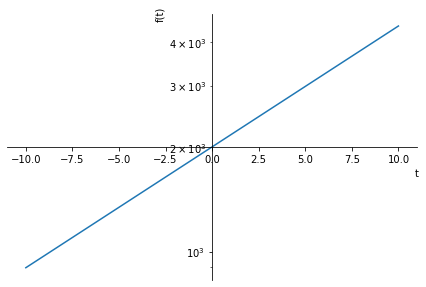

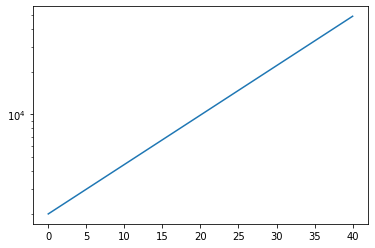

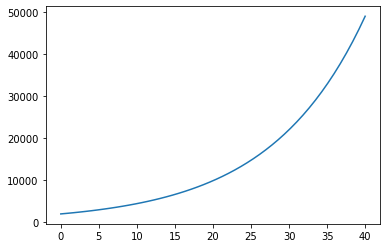

In [137]:
#sympy

r = 0.08
S0 = 2000
t = sp.symbols('t')
s = sp.Function('s')(t)

eqa = sp.Eq(s.diff(t), r*s)
display(eqa)

sol = sp.dsolve(eqa, s, ics = {s.subs(t,0):S0})
display(sol)

sp.plot(sol.rhs, yscale = "log")

f = sp.lambdify(t, sol.rhs)
t = np.linspace(0,40)

plt.figure(1)
plt.yscale("log")
plt.plot(t,f(t))

plt.figure(2)
plt.yscale("linear")
plt.plot(t,f(t))

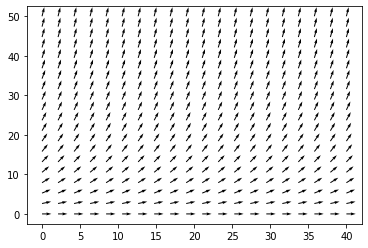

In [122]:
#quiver
r = 0.08

x = np.linspace(0,40,20)
y = np.linspace(0,50,20)

xx, yy = np.meshgrid(x,y)
slope = 0.08*yy
sx = np.cos(np.arctan(slope))
sy = np.sin(np.arctan(slope))

plt.quiver(xx,yy,sx,sy)

<h1>Second order diff</h1>

In [144]:
h = [0.1, 0.05, 0.025]
tstart = 0
tend = 6

def ytt(y, t):
    return y

for dt in h:
    y = [[2,-1]]
    x = np.arange(tstart, tend+dt, dt)
    for i in range(int((tend-tstart)/dt)):
        if i % (1/dt) == 0: 
            print("{:.8}".format(y[i,0]))
        y[i,1].append(y[i,1] + ytt(y[i,1],x[i]) * dt)
        y[i,0].append([y[i,0] + y[i,0] * dt, y[i,0] + y[i,1] * dt])
    plt.plot(x,np.array(y), label = "h = {}".format(dt))

TypeError: list indices must be integers or slices, not tuple